# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | imbituba
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 6 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 7 of Set 1 | la'ie
Processing Record 8 of Set 1 | kapa'a
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 12 of Set 1 | lulea
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | kitakata
Processing Record 18 of Set 1 | maevatanana
City not found. Skipping...
Processing Record 19 of Set 1 | hami
Processing Record 20 of

In [144]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [145]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,imbituba,-28.2400,-48.6703,61.09,65,35,9.91,BR,1696280066
1,bilibino,68.0546,166.4372,16.95,96,100,1.52,RU,1696280067
2,port-aux-francais,-49.3500,70.2167,35.58,70,85,34.09,TF,1696279814
3,jamestown,42.0970,-79.2353,81.01,56,20,3.44,US,1696279945
4,la'ie,21.6477,-157.9253,85.10,70,4,3.00,US,1696280069


In [147]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [148]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,imbituba,-28.2400,-48.6703,61.09,65,35,9.91,BR,1696280066
1,bilibino,68.0546,166.4372,16.95,96,100,1.52,RU,1696280067
2,port-aux-francais,-49.3500,70.2167,35.58,70,85,34.09,TF,1696279814
3,jamestown,42.0970,-79.2353,81.01,56,20,3.44,US,1696279945
4,la'ie,21.6477,-157.9253,85.10,70,4,3.00,US,1696280069


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

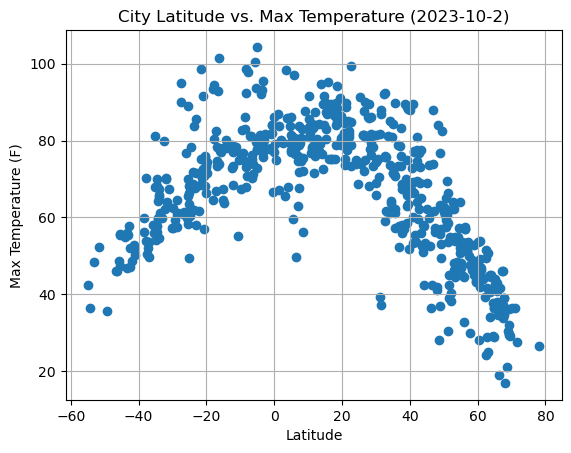

In [149]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-10-2)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

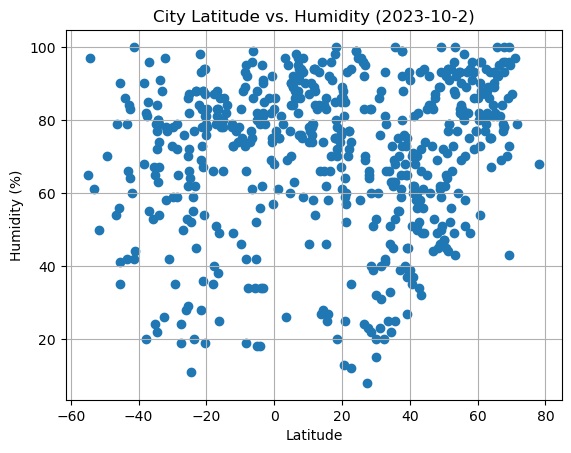

In [150]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-10-2)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

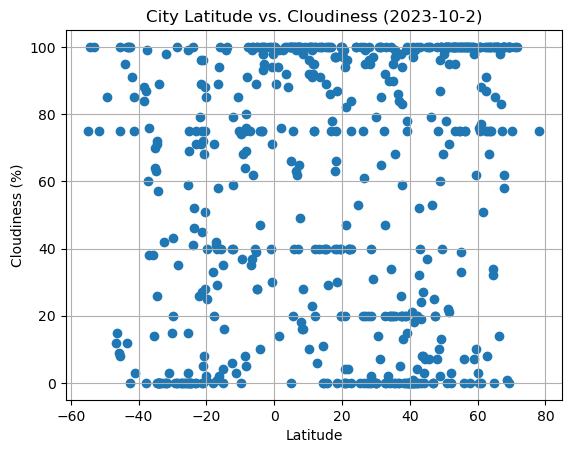

In [151]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-10-2)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

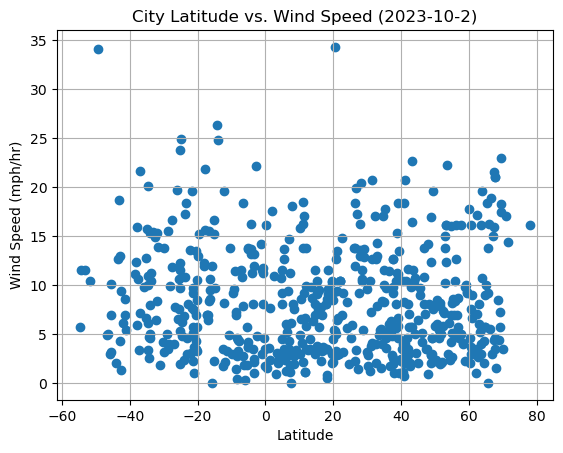

In [152]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-10-2)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph/hr)")
plt.grid()

# Save the figure
plt.savefig("output_data/Lat_vs_windspeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [153]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values):
    corr = round(st.pearsonr(x_values,y_values)[0],2)
    print(f"The r-squared is : {corr}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figtext.html
    #to add text to figures
    plt.figtext(0.1,0.9, f"The r-squared is : {corr}")
    return line_eq

In [154]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,16.95,96,100,1.52,RU,1696280067
3,jamestown,42.0970,-79.2353,81.01,56,20,3.44,US,1696279945
4,la'ie,21.6477,-157.9253,85.10,70,4,3.00,US,1696280069
5,kapa'a,22.0752,-159.3190,82.38,77,40,10.36,US,1696280070
6,kodiak,57.7900,-152.4072,47.71,49,0,16.11,US,1696279900


In [155]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,imbituba,-28.2400,-48.6703,61.09,65,35,9.91,BR,1696280066
2,port-aux-francais,-49.3500,70.2167,35.58,70,85,34.09,TF,1696279814
7,adamstown,-25.0660,-130.1015,68.29,72,69,23.73,PN,1696279836
9,edinburgh of the seven seas,-37.0676,-12.3116,49.68,55,38,21.63,SH,1696280073
10,constitucion,-35.3333,-72.4167,55.83,67,14,12.75,CL,1696280074


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is : -0.8


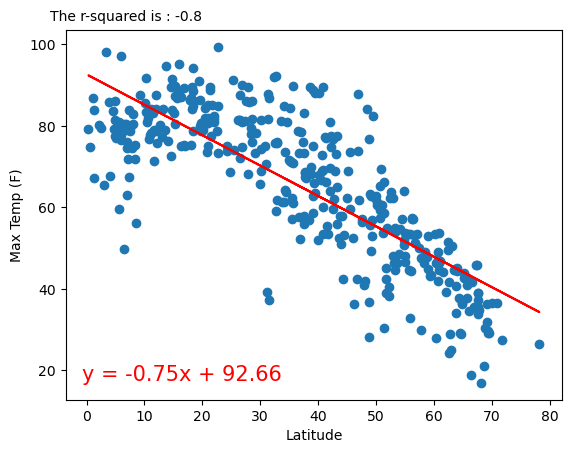

In [156]:
# Linear regression on Northern Hemisphere
temp_lat_n = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.figtext(0.15,0.15, temp_lat_n,fontsize=15,color="red")

plt.savefig("output_data/temp_lat_north_regression.png")

plt.show()

The r-squared is : 0.75


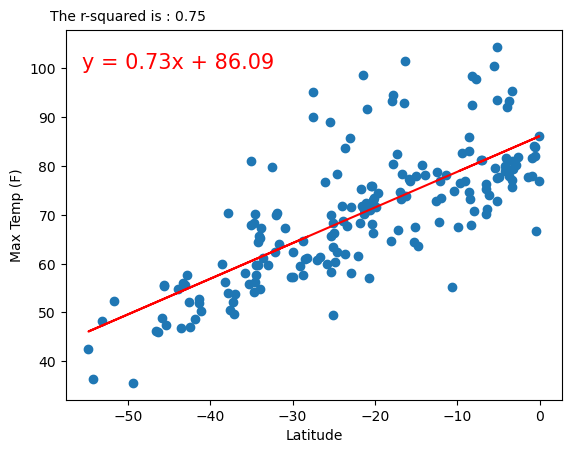

In [157]:
# Linear regression on Southern Hemisphere
temp_lat_s = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.figtext(0.15,0.8, temp_lat_s,fontsize=15,color="red")

plt.savefig("output_data/temp_lat_south_regression.png")

plt.show()

**Discussion about the linear relationship:** There is a strong negative correlation between Max Temperature and Latitude in the Northern Hemisphere, and a strong positive correlation between Max Temperature and Latitude in the Southern Hemisphere. This suggests that the Max Temperature does depend on the Latitude of the city, and that the farther the Latitude is from 0, the colder the Max Temperature is.


### Humidity vs. Latitude Linear Regression Plot

The r-squared is : 0.08


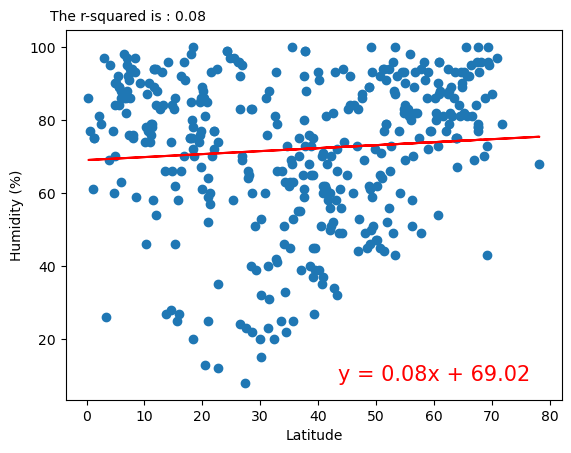

In [158]:
# Northern Hemisphere
hum_lat_n = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.figtext(0.55,0.15, hum_lat_n,fontsize=15,color="red")

plt.savefig("output_data/humidity_lat_north_regression.png")

plt.show()

The r-squared is : 0.09


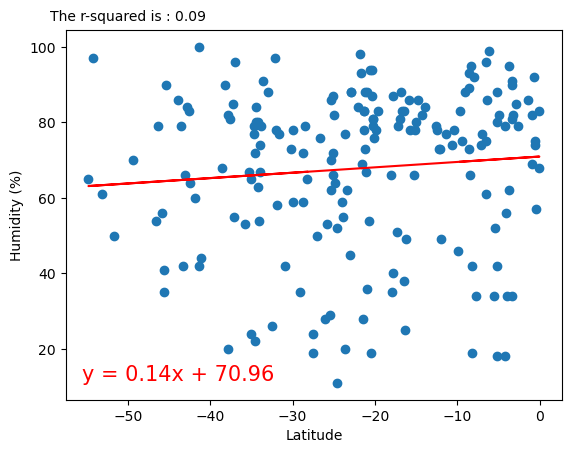

In [159]:
# Southern Hemisphere
hum_lat_s = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.figtext(0.15,0.15, hum_lat_s,fontsize=15,color="red")

plt.savefig("output_data/humidity_lat_south_regression.png")

plt.show()

**Discussion about the linear relationship:** There is a weak positive correlation beween Humidity and Latitude in the Northern and Southern Hemisphere, suggesting that the Humidity does not have a depend on the Latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is : 0.03


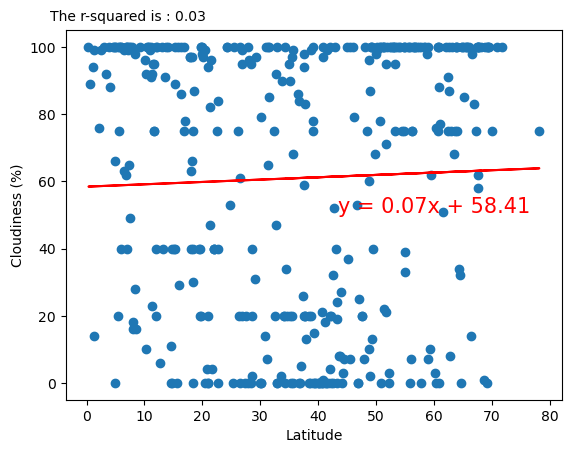

In [160]:
# Northern Hemisphere
cloud_lat_n = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.figtext(0.55,0.5, cloud_lat_n,fontsize=15,color="red")

plt.savefig("output_data/cloudiness_lat_north_regression.png")

plt.show()

The r-squared is : 0.17


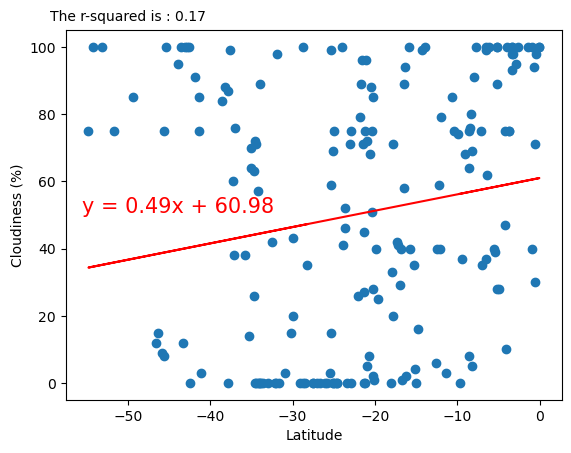

In [161]:
# Southern Hemisphere
cloud_lat_s = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.figtext(0.15,0.5, cloud_lat_s,fontsize=15,color="red")

plt.savefig("output_data/cloudiness_lat_south_regression.png")

plt.show()

**Discussion about the linear relationship:** There is a weak positive correlation beween Cloudiness and Latitude in the Northern and Southern Hemisphere, suggesting that the Cloudiness does not have a depend on the Latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is : 0.11


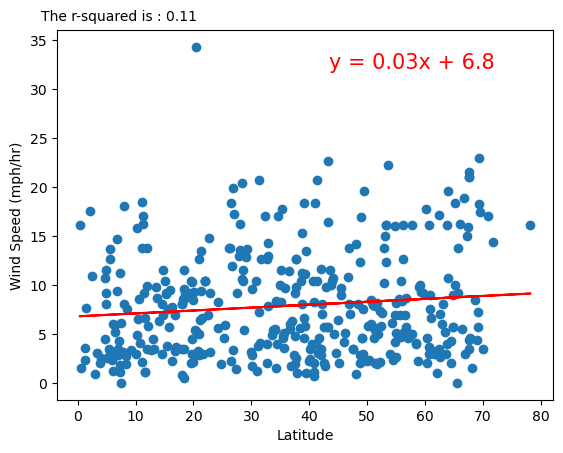

In [162]:
# Northern Hemisphere
hum_lat_n = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph/hr)")
plt.figtext(0.55,0.8, hum_lat_n,fontsize=15,color="red")

plt.savefig("output_data/windspeed_lat_north_regression.png")

plt.show()

The r-squared is : -0.1


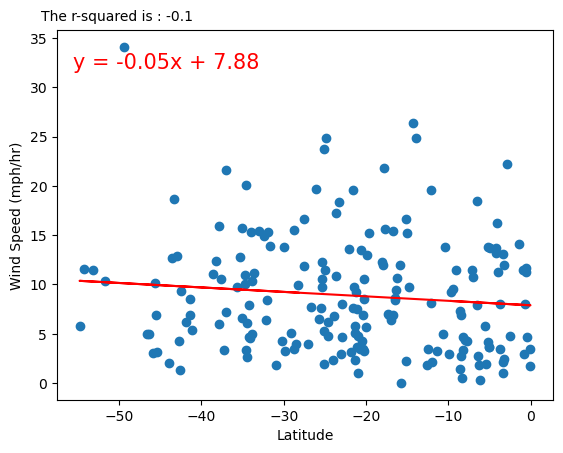

In [163]:
# Southern Hemisphere
temp_lat_s = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph/hr)")
plt.figtext(0.15,0.8, temp_lat_s,fontsize=15,color="red")

plt.savefig("output_data/windspeed_lat_south_regression.png")

plt.show()

**Discussion about the linear relationship:** There is a weak positive correlation beween Windspeed and Latitude in the Northern Hemisphere. In the Southern Hemisphere, Windspeed and Latitude have a weak negative correlation. This suggests that the Windspeed does not have a depend on the Latitude in the Southern and Northern Hemispheres.. 